In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")
import utils.data_utils as utils

In [2]:
# Access database
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()

In [3]:
# Extract discharge capacity
for key in keys:
    df = hdf.get(key)
    # Only C/10 discharge capacity data
    mask = ['C/10 cycle discharge' in seg_desc for seg_desc in df['Segment Description']]
    df_ = df[mask].copy()
    if key == keys[0]:
        discharge_capacity = utils.get_capacity(df_)
    else:
        _capacity = utils.get_capacity(df_)
        discharge_capacity = np.row_stack((discharge_capacity, _capacity))
    del df, df_
discharge_capacity

array([[4.200e+01, 1.200e-01, 4.212e+01],
       [3.773e+01, 2.300e-01, 3.796e+01],
       [4.318e+01, 2.600e-01, 4.344e+01],
       [4.085e+01, 9.000e-02, 4.094e+01],
       [3.739e+01, 9.000e-02, 3.748e+01],
       [4.247e+01, 9.000e-02, 4.256e+01],
       [4.100e+01, 9.000e-02, 4.109e+01],
       [4.278e+01, 1.000e-01, 4.288e+01],
       [3.730e+01, 9.000e-02, 3.739e+01],
       [4.055e+01, 2.600e-01, 4.081e+01],
       [3.892e+01, 1.900e-01, 3.911e+01],
       [4.384e+01, 2.100e-01, 4.405e+01],
       [2.770e+01, 7.900e-01, 2.849e+01],
       [2.770e+01, 7.900e-01, 2.849e+01],
       [1.521e+01, 1.000e+00, 1.621e+01],
       [1.521e+01, 1.000e+00, 1.621e+01],
       [5.914e+01, 1.900e-01, 5.933e+01],
       [5.914e+01, 1.900e-01, 5.933e+01],
       [2.834e+01, 4.600e-01, 2.880e+01],
       [5.762e+01, 8.000e-02, 5.770e+01],
       [5.729e+01, 6.000e-02, 5.735e+01],
       [3.487e+01, 2.200e-01, 3.509e+01],
       [5.676e+01, 1.200e-01, 5.688e+01],
       [6.434e+01, 3.000e-02, 6.43

Text(0.5, 1.0, 'CC-CV discharge capacity')

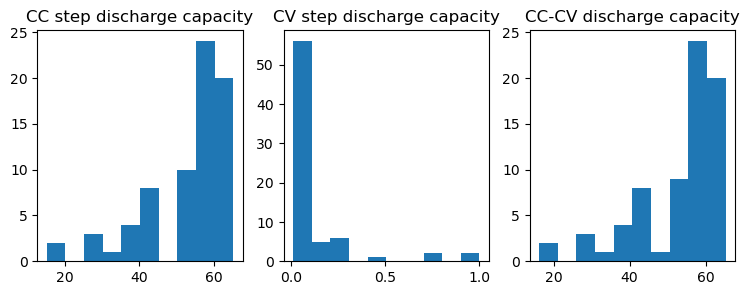

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(9,3))

ax[0].hist(discharge_capacity[:,0])
ax[0].set_title('CC step discharge capacity')

ax[1].hist(discharge_capacity[:,1])
ax[1].set_title('CV step discharge capacity')

ax[2].hist(discharge_capacity[:,2])
ax[2].set_title('CC-CV discharge capacity')

In [4]:
hdf.close()

Segments with repeats need to be split up to extract variables. This could be done by manually masking off by the 'Segment Part' column, but there's a small helper function `get_segment_parts` that does this for you.

Text(0, 0.5, 'Voltage, V')

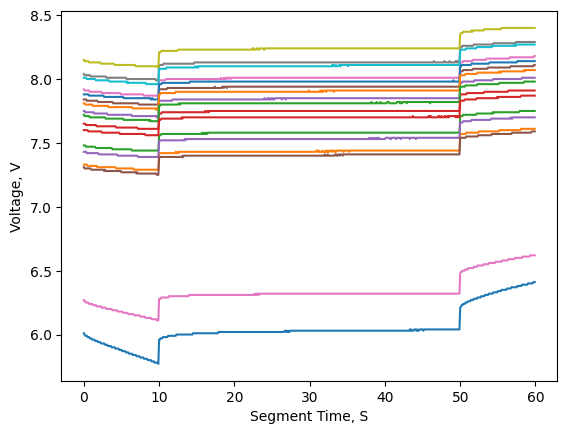

In [3]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()
df = hdf.get(keys[20])

# 1C pulses
is_pulse = ['1C pulses' in seg_desc for seg_desc in df['Segment Description']]
dfs = utils.get_segment_parts(df[is_pulse])

# Show that this worked
fig, ax = plt.subplots()
for df in dfs:
    ax.plot(df['Segment Time, S'], df['Voltage, V'])
ax.set_xlabel('Segment Time, S')
ax.set_ylabel('Voltage, V')

Simple (constant current) pulses can be processed to extract charge and discharge resistances using Ohm's law. Pulses that hit up against upper or lower voltage limits are flagged.

In [ ]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax = ax.ravel()
for key in keys:
    df = hdf.get(key)
    out = utils.get_hppc_pulse_resistances(df)
    for i in range(out.shape[0]):
        dat = out.iloc[i]
        if dat['is_voltage_limit_charge']:
            if "_A_" in key:
                ax[0].plot(dat['soc'], dat['charge_resistance_4s'], 'xr')
            else:
                ax[1].plot(dat['soc'], dat['charge_resistance_4s'], 'xr')
        else:
            if "_A_" in key:
                ax[0].plot(dat['soc'], dat['charge_resistance_4s'], 'ok', markersize=4)
            else:
                ax[1].plot(dat['soc'], dat['charge_resistance_4s'], 'ok', markersize=4)
        if dat['is_voltage_limit_discharge']:
            if "_A_" in key:
                ax[0].plot(dat['soc'], dat['discharge_resistance_4s'], 'xg')
            else:
                ax[1].plot(dat['soc'], dat['discharge_resistance_4s'], 'xg')
        else:
            if "_A_" in key:
                ax[0].plot(dat['soc'], dat['discharge_resistance_4s'], 'db', markersize=4)
            else:
                ax[1].plot(dat['soc'], dat['discharge_resistance_4s'], 'db', markersize=4)
    del df, dat, out

hdf.close()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000025BE0249DA0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000025B891DDF80> (for post_execute):



KeyboardInterrupt



Pulses that reach the upper or voltage limits have changing current during the pulse, so they cannot be analyzed in the same way (the calculated resistance values are non-sensical).

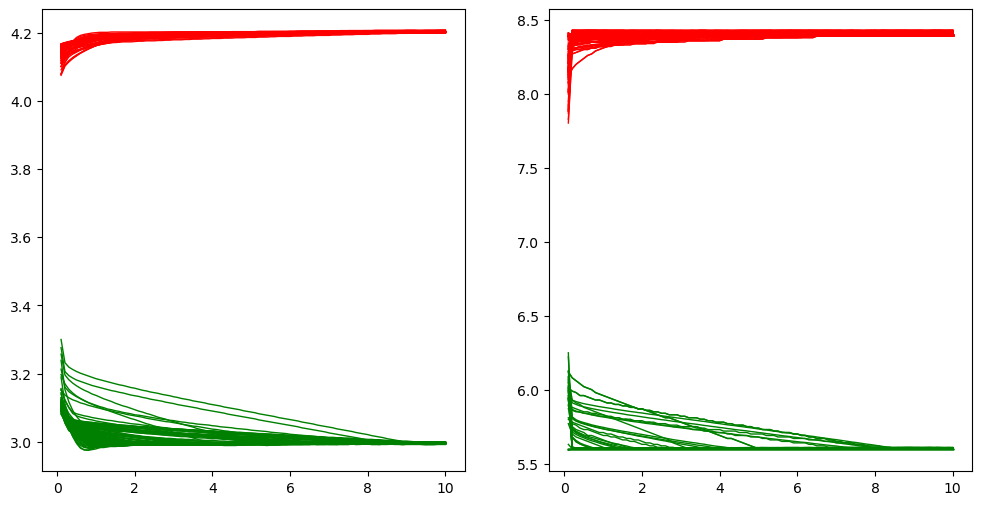

In [ ]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax = ax.ravel()
for key in keys:
    df = hdf.get(key)
    out = utils.get_hppc_pulse_resistances(df)
    for i in range(out.shape[0]):
        dat = out.iloc[i]
        if dat['is_voltage_limit_charge']:
            if "_A_" in key:
                ax[0].plot(dat['pulse_time_s'], dat['charge_voltage'], '-r', linewidth=1)
            else:
                ax[1].plot(dat['pulse_time_s'], dat['charge_voltage'], '-r', linewidth=1)
        if dat['is_voltage_limit_discharge']:
            if "_A_" in key:
                ax[0].plot(dat['pulse_time_s'], dat['discharge_voltage'], '-g', linewidth=1)
            else:
                ax[1].plot(dat['pulse_time_s'], dat['discharge_voltage'], '-g', linewidth=1)
    del df, dat, out

hdf.close()

Leaf modules have additional voltage signals and resistance values calculated for each separate group. Some of the modules had noisy data, so these cells have resistance calculated using the 10 mV voltage channel, instead of the 1 mV voltage channels, and only the overall module resistance (not resistances for each parallel group).

The modules are in series, so their resistances and voltages sum to the full module resistance/voltage.

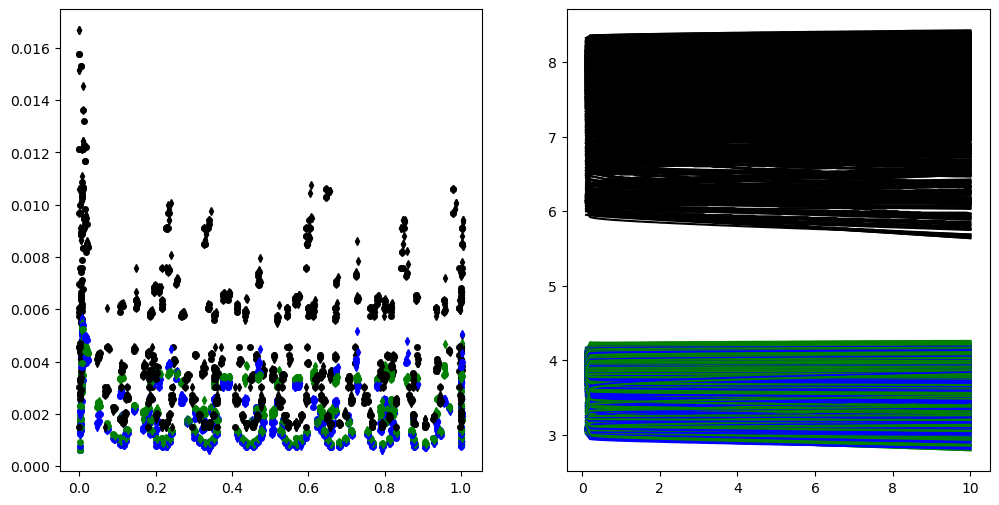

In [9]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax = ax.ravel()
for key in keys:
    if "Leaf" in key:
        df = hdf.get(key)
        out = utils.get_hppc_pulse_resistances(df)
        for i in range(out.shape[0]):
            dat = out.iloc[i]
            if not dat['is_voltage_limit_charge']:
                ax[0].plot(dat['soc'], dat['charge_resistance_4s'], 'ok', markersize=4)
                ax[1].plot(dat['pulse_time_s'], dat['charge_voltage'], '-k')
                if any(['Cell Voltage A1' in col for col in df.columns]):
                    ax[0].plot(dat['soc'], dat['charge_resistance_group1_4s'], 'ob', markersize=4)
                    ax[0].plot(dat['soc'], dat['charge_resistance_group2_4s'], 'og', markersize=4)
                    ax[1].plot(dat['pulse_time_s'], dat['charge_voltage_group1'], '-b')
                    ax[1].plot(dat['pulse_time_s'], dat['charge_voltage_group2'], '-g')
            if not dat['is_voltage_limit_discharge']:
                ax[0].plot(dat['soc'], dat['discharge_resistance_4s'], 'dk', markersize=4)
                ax[1].plot(dat['pulse_time_s'], dat['discharge_voltage'], '-k')
                if any(['Cell Voltage A1' in col for col in df.columns]):
                    ax[0].plot(dat['soc'], dat['discharge_resistance_group1_4s'], 'db', markersize=4)
                    ax[0].plot(dat['soc'], dat['discharge_resistance_group2_4s'], 'dg', markersize=4)
                    ax[1].plot(dat['pulse_time_s'], dat['discharge_voltage_group1'], '-b')
                    ax[1].plot(dat['pulse_time_s'], dat['discharge_voltage_group2'], '-g')
        del df, dat, out

hdf.close()

Discharge capacity is a function of rate and temperature. SOH variable we will use for modeling is the CC discharge capacity. `extract_targets.py` extracts these values and saves them to a file.

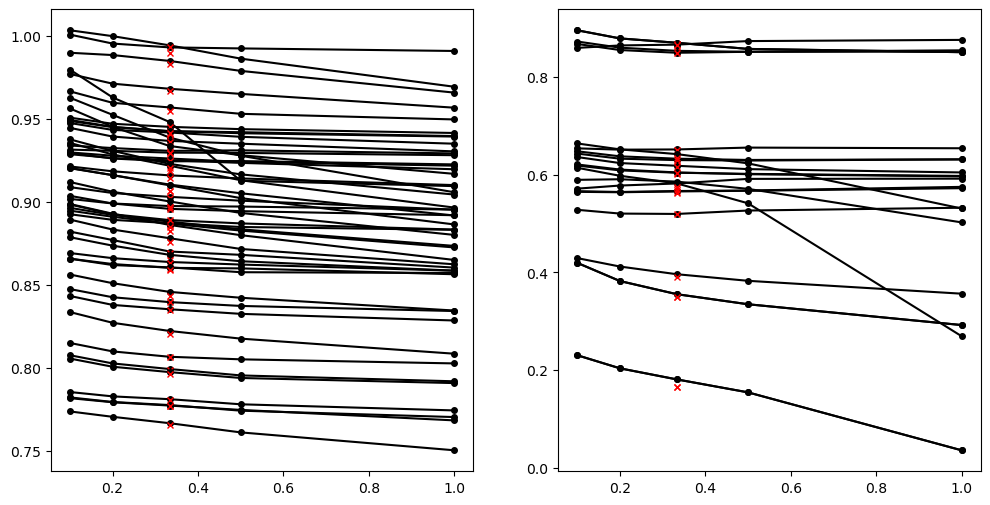

In [ ]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()
# Extract CC discharge capacity at all rates
fig, ax = plt.subplots(1,4, figsize=(12,3))
for key in keys:
    df = hdf.get(key)
    capacity = utils.get_discharge_capacities_cc(df)
    if "_A_" in key:
        ax[0].plot(capacity.loc[0:4, 'rate'], capacity.loc[0:4, 'discharge capacity']/64, '-ok', markersize=4)
        ax[0].plot(capacity.loc[5, 'rate'], capacity.loc[5, 'discharge capacity']/64, 'xr', markersize=4)
    elif 'Leaf' in key:
        ax[1].plot(capacity.loc[0:4, 'rate'], capacity.loc[0:4, 'discharge capacity']/66, '-ok', markersize=4)
        ax[1].plot(capacity.loc[5, 'rate'], capacity.loc[5, 'discharge capacity']/66, 'xr', markersize=4)
    elif '_C_' in key:
        ax[2].plot(capacity.loc[0:4, 'rate'], capacity.loc[0:4, 'discharge capacity']/26, '-ok', markersize=4)
        ax[2].plot(capacity.loc[5, 'rate'], capacity.loc[5, 'discharge capacity']/26, 'xr', markersize=4)
    elif 'A123' in key:
        ax[3].plot(capacity.loc[0:4, 'rate'], capacity.loc[0:4, 'discharge capacity']/2.3, '-ok', markersize=4)
        ax[3].plot(capacity.loc[5, 'rate'], capacity.loc[5, 'discharge capacity']/2.3, 'xr', markersize=4)

hdf.close()

HPPC resistance has many trends, not only versus SOC and temperature, but also hysteresis due to direction. This can be used to help explain why this problem is interesting and hard!

In [ ]:
hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
keys = hdf.keys()
df = hdf.get(keys[5])
out = utils.get_hppc_pulse_resistances(df)
out = out.loc[np.logical_and(np.logical_and(out['rate'] == '1C', ~out['is_voltage_limit_discharge']), ~out['is_voltage_limit_charge'])].reset_index().copy()

plt.plot(out.loc[out['direction'] == 'charge', 'soc'], out.loc[out['direction'] == 'charge','discharge_resistance_10s'], '-ok', label='Discharge pulse during charging')
plt.plot(out.loc[out['direction'] == 'discharge', 'soc'], out.loc[out['direction'] == 'discharge','discharge_resistance_10s'], '--dk', label='Discharge pulse during discharging')
plt.plot(out.loc[out['direction'] == 'charge', 'soc'], out.loc[out['direction'] == 'charge','charge_resistance_10s'], '-ob', label='Charge pulse during charging')
plt.plot(out.loc[out['direction'] == 'discharge', 'soc'], out.loc[out['direction'] == 'discharge','charge_resistance_10s'], '--db', label='Charge pulse during discharging')

soc_charging = out.loc[out['direction'] == 'charge', 'soc']
dcir_dis_charging = out.loc[out['direction'] == 'charge','discharge_resistance_10s']
dcir_chg_charging = out.loc[out['direction'] == 'charge','charge_resistance_10s']
dcir_dis_charging_50soc = np.interp(0.5, soc_charging, dcir_dis_charging)
dcir_chg_charging_50soc = np.interp(0.5, soc_charging, dcir_chg_charging)
plt.plot(0.5, dcir_dis_charging_50soc, 'dr')
plt.plot(0.5, dcir_chg_charging_50soc, 'or')


soc_discharging = out.loc[out['direction'] == 'discharge', 'soc']
dcir_dis_discharging = out.loc[out['direction'] == 'discharge','discharge_resistance_10s']
dcir_chg_discharging = out.loc[out['direction'] == 'discharge','charge_resistance_10s']
idx_sort = np.argsort(soc_discharging)
dcir_dis_discharging_50soc = np.interp(0.5, soc_discharging.to_numpy()[idx_sort], dcir_dis_discharging.to_numpy()[idx_sort])
dcir_chg_discharging_50soc = np.interp(0.5, soc_discharging.to_numpy()[idx_sort], dcir_chg_discharging.to_numpy()[idx_sort])
plt.plot(0.5, dcir_dis_discharging_50soc, 'dr')
plt.plot(0.5, dcir_chg_discharging_50soc, 'or')

plt.legend()

There are helper functions to grab the raw current-voltage-time data for each of the pulse types in a ML ready format.

In [2]:
hppc = utils.get_hppc_pulses(df)
hppc

,soc,temperature,direction,voltage_0.0s,voltage_1.0s,voltage_2.0s,voltage_3.0s,voltage_4.0s,voltage_5.0s,voltage_6.0s,...,current_111.0s,current_112.0s,current_113.0s,current_114.0s,current_115.0s,current_116.0s,current_117.0s,current_118.0s,current_119.0s,current_120.0s
0,0.01161058692428209,34.83057851239669,charge,6.79,6.52,6.51,6.5,7.06,7.09,7.11,...,131.98,131.98,132.0,131.98,131.98,131.98,66.0,66.0,65.98,66.0
1,0.17924764550822514,35.607438016528924,charge,7.98,7.75,7.74,7.74,8.19,8.21,8.22,...,132.0,132.0,131.98,131.98,131.98,131.98,65.98,65.98,65.98,66.0
2,0.3468838596346674,36.14462809917355,charge,8.15,7.93,7.93,7.92,8.35,8.36,8.37,...,131.92,131.12,129.44,127.82,126.32,124.94,65.98,66.0,66.0,66.0
3,0.5127353128327274,37.0,charge,8.31,8.11,8.1,8.09,8.4,8.4,8.4,...,99.46,98.2,97.34,96.22,95.4,94.66,65.98,65.98,65.98,66.0
4,0.9883989928795708,33.5,discharge,7.94,8.17,8.18,8.19,7.72,7.71,7.7,...,-132.0,-131.98,-131.98,-131.98,-132.0,-131.98,-66.0,-66.0,-66.0,-66.0
5,0.8183132367695166,34.12396694214876,discharge,7.67,7.89,7.9,7.91,7.46,7.45,7.44,...,-131.98,-131.98,-132.0,-132.0,-132.0,-132.0,-66.0,-66.0,-65.98,-65.98
6,0.4832597671173421,35.586776859504134,discharge,7.42,7.63,7.64,7.64,7.23,7.21,7.21,...,-131.98,-131.98,-131.98,-132.0,-131.98,-131.98,-65.98,-65.98,-65.98,-65.98
7,0.3157311126192073,36.48760330578512,discharge,7.26,7.47,7.47,7.48,7.07,7.06,7.05,...,-131.98,-131.98,-131.98,-132.0,-132.0,-131.98,-65.98,-66.0,-66.0,-66.0
8,0.14819866096757184,37.43388429752066,discharge,6.91,7.12,7.13,7.14,6.72,6.71,6.69,...,-131.98,-131.98,-131.98,-131.98,-131.98,-131.98,-65.98,-65.98,-65.98,-65.98
